In [126]:
import pandas as pd
import numpy as np
import jax.numpy as jnp
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"] # Example: specify a serif font
})

In [127]:
df = pd.read_excel("Mat_time_pres_pos_data_1501.xlsx", header =None, sheet_name= "Pressure")               
df.head()



,0,1,2,3,4,5,6,7,8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Time(s),Extruder Pressure (PSI),Pump Pressure(PSI),Temperature(C),NaN,NaN,We only care about the Pump Pressure
2,NaN,NaN,0,687.94829,332.927429,279.594642,NaN,NaN,NaN
3,NaN,NaN,0.060966,721.002479,305.609107,279.594642,NaN,NaN,NaN
4,NaN,NaN,0.108939,747.514903,285.115698,279.594642,NaN,NaN,NaN


In [128]:
subset = df.iloc[1:, 2:6]
# Make the first row the header

new_header = subset.iloc[0]   # get the first row
subset = subset[1:]           # take the data after the header row
subset.columns = new_header   # set header
subset = subset.reset_index(drop=True)  # clean index
print(subset.head())


1   Time(s) Extruder Pressure (PSI) Pump Pressure(PSI) Temperature(C)
0         0               687.94829         332.927429     279.594642
1  0.060966              721.002479         305.609107     279.594642
2  0.108939              747.514903         285.115698     279.594642
3  0.154912               767.74587         270.662268     279.594642
4  0.200885              781.886558          261.56303     279.594642


In [129]:
pressure = subset['Pump Pressure(PSI)'].values[1:]
pressure_times = subset['Time(s)'].values[1:]

In [130]:
df= pd.read_excel("Mat_time_pres_pos_data_1501.xlsx", header =None, sheet_name= "Position")
df.head()
columns_to_drop = [0, 1,7, 9, 10, 11, 12]

df.drop(df.columns[columns_to_drop], axis=1, inplace=True)


subset = df.iloc[1:, :]
new_header = subset.iloc[0]
subset.columns = new_header
subset = subset.reset_index(drop=True)  # clean index
subset.head()

1,Time(seconds),x(mm),y(mm),z(mm),Speed (mm/s),Flowrate[m^3/s],Area of bead(mm^2)
0,Time(seconds),x(mm),y(mm),z(mm),Speed (mm/s),Flowrate[m^3/s],Area of bead(mm^2)
1,0,-38.25,0,0,32.941176,0.0,8.809149
2,0.05,-38.25,-1.68,0,33.6,0.0,NaN
3,0.101,-38.25,-3.37,0,33.137255,0.0,NaN
4,0.151,-38.25,-5.05,0,33.6,0.0,NaN


In [131]:
# xreate all the ararys 

time = subset['Time(seconds)'].values[1:]
x_locs = subset['x(mm)'].values[1:]
y_locs = subset['y(mm)'].values[1:]
z_locs = subset['z(mm)'].values[1:]
speeds = subset['Speed (mm/s)'].values[1:]
flow_rates = subset['Flowrate[m^3/s]'].values[1:]



In [132]:
# check lengths

print(pressure.shape)
print(speeds.shape)

print(time.shape)

print(time)

(8234,)
(8406,)
(8406,)
[0 0.0500000000000007 0.100999999999999 ... 424.267 424.318 424.368]


Text(0, 0.5, 'Normalized Speeds/Pressure')

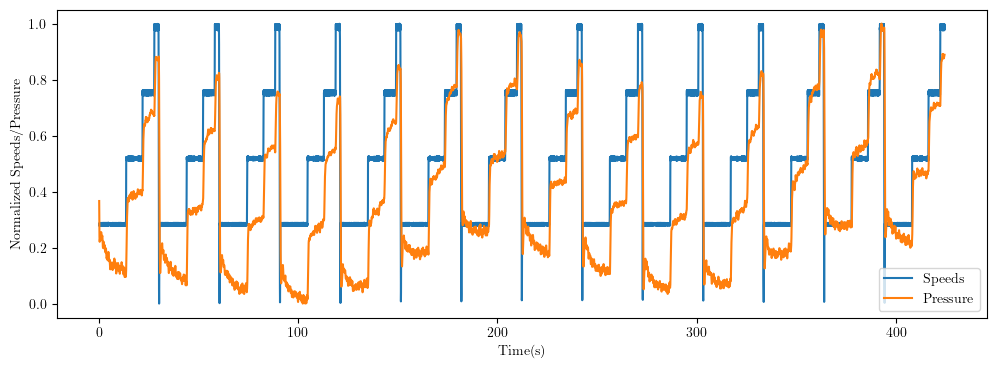

In [142]:

def normalize(x:np.array):
    return (x- np.min(x))/(np.max(x)- np.min(x))
                           
fig, ax = plt.subplots(1,1, figsize=(12, 4))

ax.plot(time, normalize(speeds), label = 'Speeds')
ax.plot(pressure_times, normalize(pressure), label = 'Pressure')
ax.set_xlabel('Time(s)')
ax.legend(loc='best')
ax.set_ylabel('Normalized Speeds/Pressure')
#plt.plot(pressure[:600])

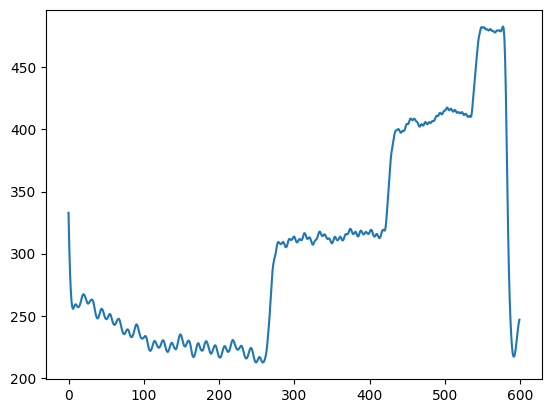

In [49]:
plt.plot(pressure[:600])